In [30]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as norm
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [31]:
# Lets do some sample exloratory data analysis here.  Are we missing any data, etc etc
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
print train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# EDA

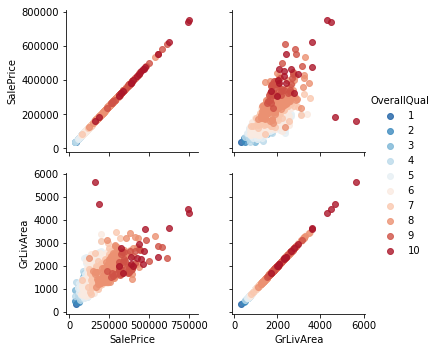

In [33]:
g = sns.PairGrid(train_df, vars=['SalePrice', 'GrLivArea'],
                 hue='OverallQual', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

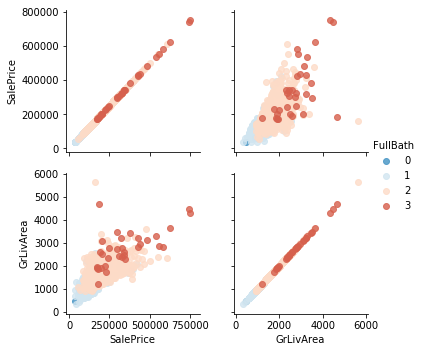

In [34]:
g = sns.PairGrid(train_df, vars=['SalePrice', 'GrLivArea'],
                 hue='FullBath', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

## Target

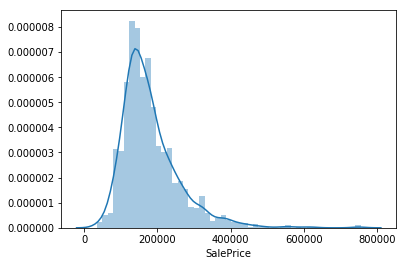

In [35]:
sns.distplot(train_df['SalePrice'])

## Important Categorical Var

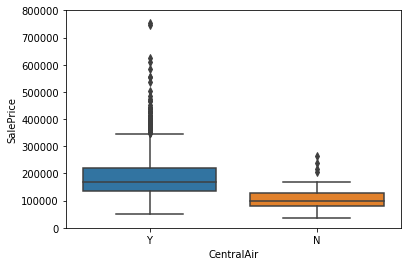

In [36]:
# CentralAir
var = 'CentralAir'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

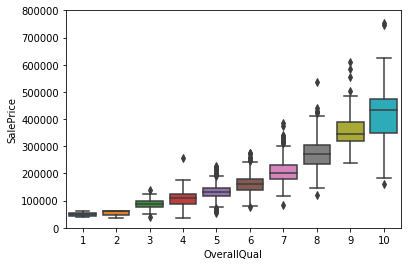

In [37]:
# OverallQual
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

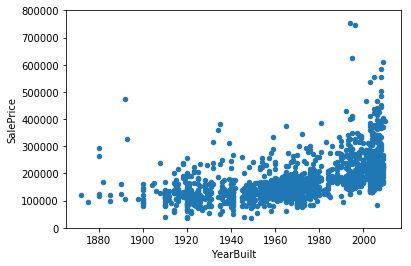

In [38]:
# YearBuilt  scatter
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

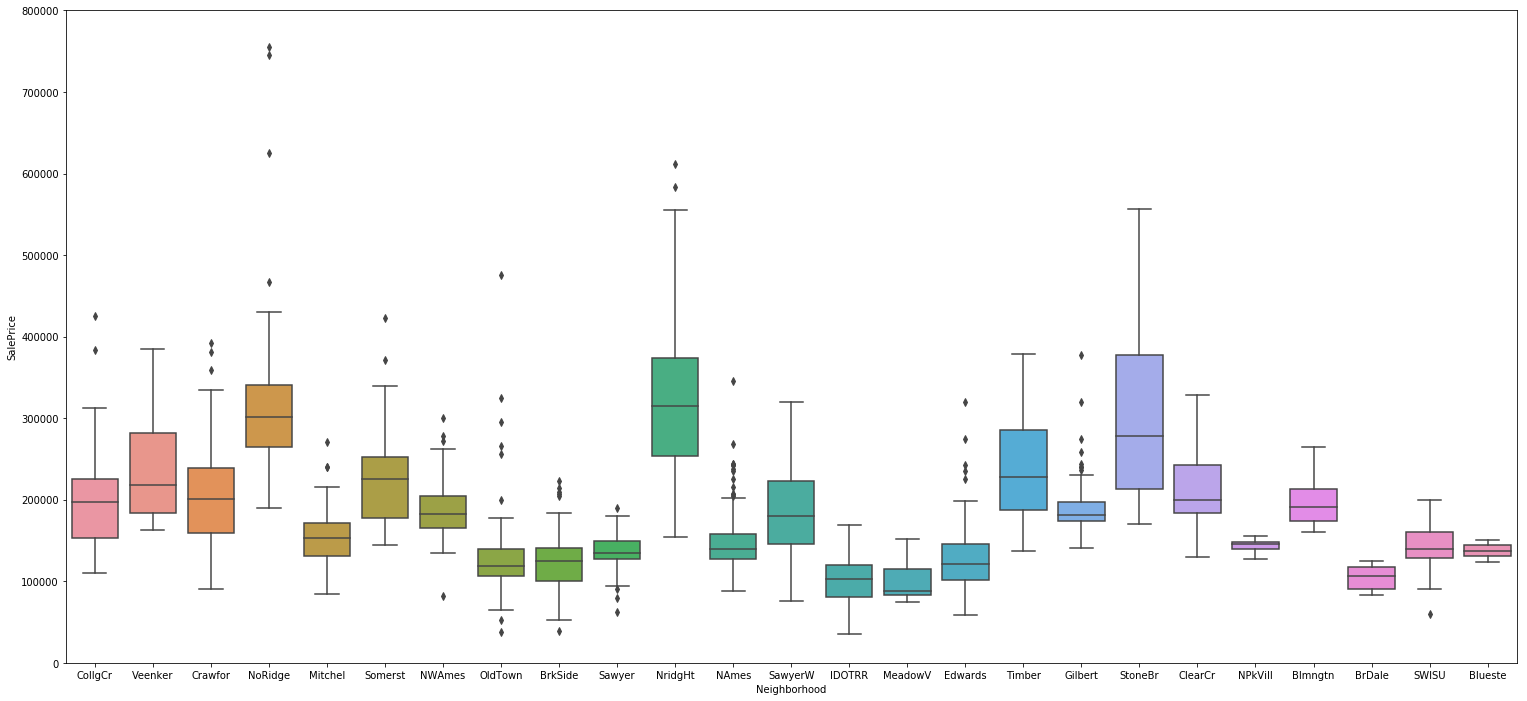

In [39]:
# Neighborhood
var = 'Neighborhood'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

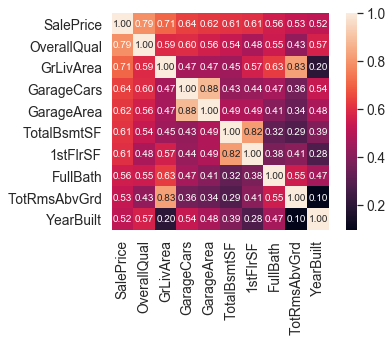

In [47]:
corrmat = train_df.corr()
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modelling

After initial EDA, the following 6 features are highly correlated with SalePrice. \n
A multivariate linear regression is built based on them to predict the SalePrice.

In [40]:
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

In [41]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF','TotRmsAbvGrd', 'YearBuilt']
x = train_df[cols].values
y = train_df['SalePrice'].values
x_scaled = StandardScaler().fit_transform(x)
y_log = np.log(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_log, test_size=0.33, random_state=42)

In [42]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print model.score(X_train,y_train)

0.7960387500198832


In [43]:
y_pred = model.predict(X_test)
print rmse(y_test,y_pred)

[0.16717042]


In [44]:
model.coef_

array([[0.14656935, 0.10760054, 0.07838846, 0.04074715, 0.0098984 ,
        0.06903565]])

In [45]:
model.intercept_

array([12.02258768])